# Irreps

群表示(D,V)描述了群G在向量空间V上的作用。                
$D: G \longrightarrow \text { 线性映射在 } V \text {. }$                
不可约表示，简而言之，不可约表示是最小的表示。                  
- 任何表示法都可以通过基的变换分解成不可逆的直接和
- 任何物理量在$O(3)$的作用下，用$O(3)$的表示变换。

SO(3)的矩阵称为维格纳矩阵$D^L$。逆群$({e,I})$的逆表示为平凡表示$σ^+$和符号表示$σ^-$。

$$\sigma_p(g)=\left\{\begin{array}{l}
1 \text { if } g=e \\
p \text { if } g=I
\end{array}\right.$$

群$O(3)$是$SO(3)$与逆的直接乘积。                                
$g=r i, \quad r \in S O(3), i \in \text { inversion. }$

$O(3)$的不可约是SO(3)的不可约和反转的乘积。类[e3nn的实例](https://docs.e3nn.org/en/latest/api/o3/o3_irreps.html#e3nn.o3.Irreps)表示$0(3)$不可约的直接和。

$$g=r i \mapsto \bigoplus_{j=1}^n m_j \times \sigma_{p_j}(i) D^{L_j}(r)$$

$\left(m_j \in \mathbb{N}, p_j= \pm 1, L_j=0,1,2,3, \ldots\right)_{j=1}^n$定义了[`e3nn.o3.Irreps`](https://docs.e3nn.org/en/latest/api/o3/o3_irreps.html#e3nn.o3.Irreps)

$0(3)$的重复和球谐波经常混淆，重复和球谐波之间的关系在[<球谐波>](https://docs.e3nn.org/en/latest/api/o3/o3_sh.html#spherical-harmonics)一章中作了解释。

`class e3nn.o3.Irrep(l: int | Irrep | str | tuple, p=None)`                
基础$Tuple$                              
不可约表示$SO(3)$               
这个类不包含任何数据，它是一个描述表示的结构。它通常用作库中其他类的参数，以定义函数的输入和输出表示。                  

- 参数: $L$ (int)非负整数，表示的程度 $l=0,1, \ldots$                                        
        $p ({1, -1})$ 表示的奇偶性

 
        

## 方法
| 方法 | 备注 |
|--|--|
| `D_from_angles(alpha, beta, gamma[, k])` | $\text { Matrix } p^k D^l(\alpha, \beta, \gamma)$ |
| `D_from_axis_angle(axis, angle)` | 表示的矩阵，请参见[Irrep.D_from_angles](https://docs.e3nn.org/en/latest/api/o3/o3_irreps.html#e3nn.o3.Irrep.D_from_angles) |
| `D_from_matrix(R)` | 表示的矩阵，请参见[Irrep.D_from_angles](https://docs.e3nn.org/en/latest/api/o3/o3_irreps.html#e3nn.o3.Irrep.D_from_angles) |
| `D_from_quaternion(q[, k])` | 表示的矩阵，请参见[Irrep.D_from_angles](https://docs.e3nn.org/en/latest/api/o3/o3_irreps.html#e3nn.o3.Irrep.D_from_angles) |
| `count(_value)` | 返回value出现的次数。 |
| `index(_value)` | 返回第一个值索引。 |
| `is_scalar()` | 等价于$l == 0$和$p == 1$ |
| `iterator([lmax])` | 遍历O(3)的所有结点的迭代器 |



## 属性
| 属性 | 备注 |
|--|--|
| `dim` | 表示的维度，$2l+1$ |
| `l` | 度表示，$l=0,1...$ |
| `p` | 奇偶性表示，$p= \pm 1$ |

## 实例


In [2]:
from e3nn import o3

/DYZ/dyz1/anaconda3/envs/cv_project/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
irreps = o3.Irreps("1o")
irreps

1x1o

In [4]:
# Tuple[Tuple[int, Tuple[int, int]]]
# ((multiplicity, (l, p)), ...)

print(len(irreps))
mul_ir = irreps[0]  # a tuple

print(mul_ir)
print(len(mul_ir))
mul = mul_ir[0]  # an int
ir = mul_ir[1]  # another tuple

print(mul)

print(ir)
# print(len(ir))  ir is a tuple of 2 ints but __len__ has been disabled since it is always 2
l = ir[0]
p = ir[1]

print(l, p)

1
1x1o
2
1
1o
1 -1


给出对应于反转的变换矩阵

In [5]:
import torch
t = torch.tensor
print(t(1))
# show the transformation matrix corresponding to the inversion
irreps.D_from_angles(alpha=t(0.0), beta=t(0.0), gamma=t(0.0), k=t(1))

tensor(1)


tensor([[-1., -0., -0.],
        [-0., -1., -0.],
        [-0., -0., -1.]])

绕y轴做一个小旋转

In [9]:
irreps.D_from_angles(alpha=t(0.1), beta=t(0.0), gamma=t(0.0), k=t(0))

tensor([[ 0.9950,  0.0000,  0.0998],
        [ 0.0000,  1.0000,  0.0000],
        [-0.0998,  0.0000,  0.9950]])

## 变换示例

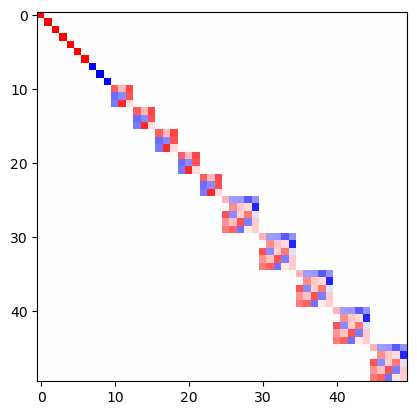

In [10]:
irreps = o3.Irreps("7x0e + 3x0o + 5x1o + 5x2o")
rot = -o3.rand_matrix()

D = irreps.D_from_matrix(rot)

import matplotlib.pyplot as plt
plt.imshow(D, cmap='bwr', vmin=-1, vmax=1);


创建偶数奇偶的标量表示(l=0)。

In [6]:
o3.Irrep(0, 1)

0e

创建奇数奇偶校验的伪张量表示(l=2)。

In [7]:
o3.Irrep(2, -1)

2o

创建球形谐波奇偶校验的向量表示$(L = 1)$($-1^l$给出奇数)。

In [8]:
o3.Irrep("1y")

1o

In [9]:
o3.Irrep("2o").dim

5

In [7]:
list(o3.Irrep("1o") * o3.Irrep("1o"))

[0e, 1e, 2e]

In [10]:
o3.Irrep("2e") in o3.Irrep("1o") * o3.Irrep("1o")

True

In [11]:
o3.Irrep("1o") + o3.Irrep("2o")

1x1o+1x2o

In [14]:
from e3nn.o3 import Irrep, Irreps
import torch

list(Irrep("1o") * Irrep("1o"))

[0e, 1e, 2e]

In [20]:
Irreps("16x1o") + Irreps("16x1o")

NotImplementedError: Use o3.TensorProduct for this, see the documentation

In [4]:
-torch.eye(3)

tensor([[-1., -0., -0.],
        [-0., -1., -0.],
        [-0., -0., -1.]])

In [11]:
Irreps("5x0e + 10x1o").randn(-1, 35, normalization='norm').shape

torch.Size([35, 35])

In [ ]:
o3.TensorProduct